In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("customer_churn.csv")

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Task 1: Data Manipulation

In [14]:


customer_churn = pd.read_csv('customer_churn.csv')



In [8]:
customer_5 = customer_churn.iloc[:, 4]

In [9]:
customer_15 = customer_churn.iloc[:, 14]


In [12]:
senior_male_electronic = customer_churn[
    (customer_churn['gender'] == 'Male') &
    (customer_churn['SeniorCitizen'] == 1) &
    (customer_churn['PaymentMethod'] == 'Electronic check')
]


In [16]:
customer_total_tenure = customer_churn[
    (customer_churn['tenure'] > 70) |
    (customer_churn['MonthlyCharges'] > 100)
]

two_mail_yes = customer_churn[
    (customer_churn['Contract'] == 'Two year') &
    (customer_churn['PaymentMethod'] == 'Mailed check') &
    (customer_churn['Churn'] == 'Yes')
]

In [18]:
customer_333 = customer_churn.sample(n=333)

churn_counts = customer_churn['Churn'].value_counts()


In [ ]:
# Task 2: Data Visualization


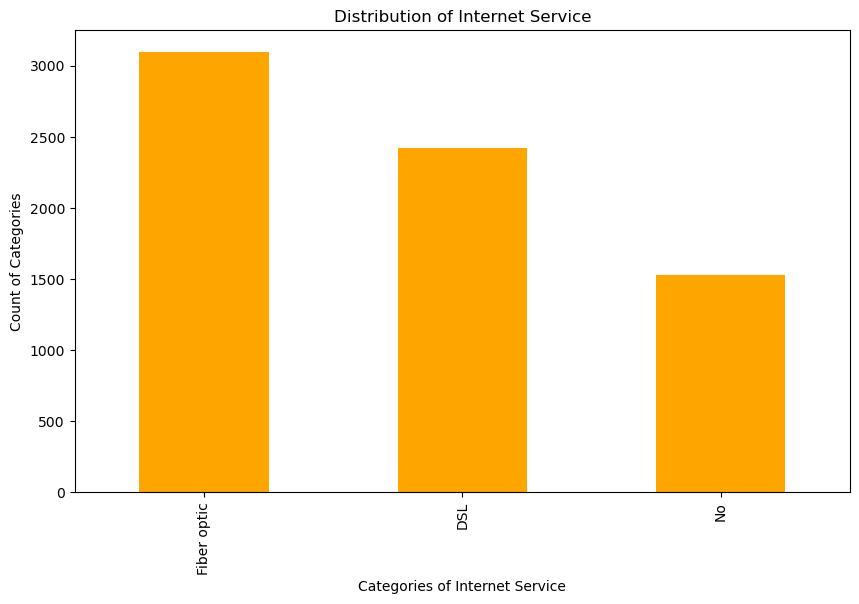

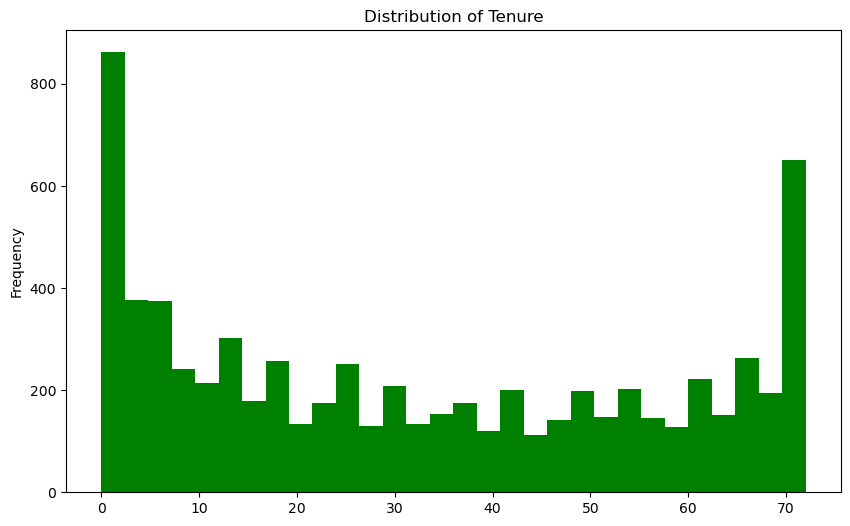

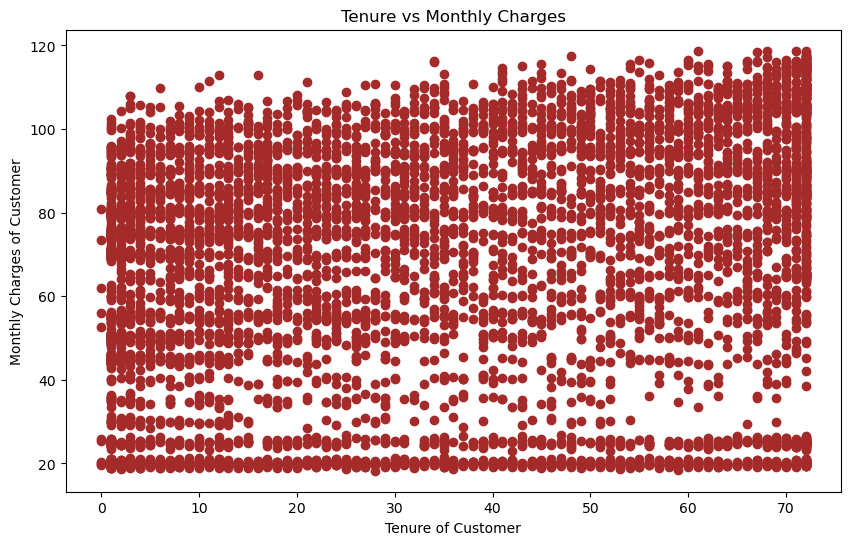

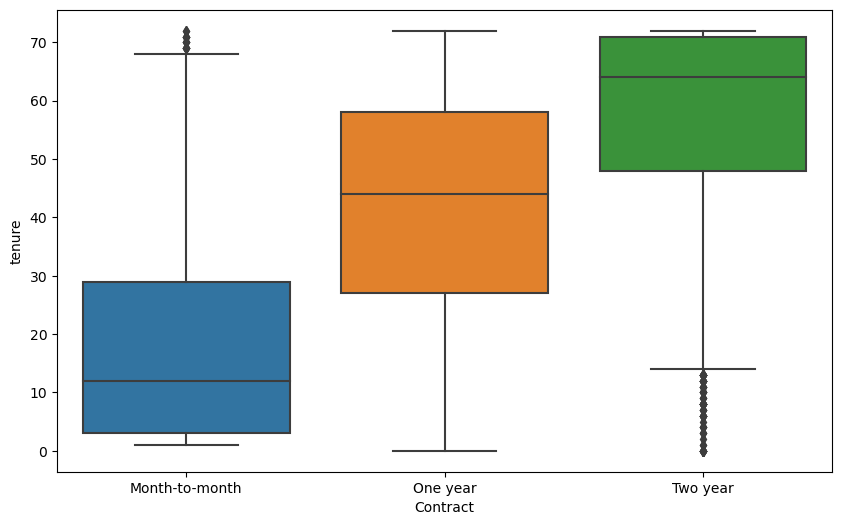

Root Mean Square Error: 845.6091871095869


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 

customer_churn = pd.read_csv('customer_churn.csv')


plt.figure(figsize=(10, 6))
customer_churn['InternetService'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

plt.figure(figsize=(10, 6))
customer_churn['tenure'].plot(kind='hist', bins=30, color='green')
plt.title('Distribution of Tenure')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(customer_churn['tenure'], customer_churn['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=customer_churn)
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = customer_churn[['tenure']]
y = customer_churn['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = mean_squared_error(y_test, y_pred)
print('Root Mean Square Error:', error)

In [ ]:
# Task 4: Logistic Regression 


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

X = customer_churn[['MonthlyCharges']]
y = customer_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy Score:', accuracy)


Confusion Matrix:
 [[1797    0]
 [ 669    0]]
Accuracy Score: 0.7287104622871047


In [ ]:
# Task 5: Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

X = customer_churn[['tenure']]
y = customer_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy Score:', accuracy)

Confusion Matrix:
 [[951  85]
 [257 116]]
Accuracy Score: 0.7572746628814763


In [ ]:
# Task 6: Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier

X = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy Score:', accuracy)


Confusion Matrix:
 [[1336  203]
 [ 310  264]]
Accuracy Score: 0.7572172266919073
